In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


import statsmodels.api as sm
from sklearn.tree import export_graphviz
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

In [96]:
cwd =os.getcwd()
os.chdir("/Users/luqingqi/Desktop/2022 datathon")

In [97]:
df = pd.read_csv('NJ-total.csv', header= 0,
                        encoding= 'unicode_escape')

In [98]:
df=df.drop('DATE', axis =1)

In [99]:
df=df.drop('TIMESTAMP', axis =1)

In [100]:
df=df.drop('CONTENT_TEXT', axis =1)

In [101]:
df=df.drop('CONTENT_HASHTAGS', axis =1)

In [102]:
df=pd.get_dummies(df)

In [103]:
df

,IMPACT,ENGAGEMENT,CONTENT_RETWEET_COUNT,CONTENT_FAVORITE_COUNT,GAMERESULTS,Vader,CHANNEL_INFO_TYPE_link,CHANNEL_INFO_TYPE_photo,CHANNEL_INFO_TYPE_photo and link,CHANNEL_INFO_TYPE_text only,Vader_pol_negative,Vader_pol_neutral,Vader_pol_positive
0,0.1455,51,4,47,1,0.5849,0,1,0,0,0,0,1
1,0.1758,60,3,57,1,0.2732,0,1,0,0,0,0,1
2,1.0031,355,39,316,1,-0.4767,1,0,0,0,1,0,0
3,0.2874,101,3,98,1,0.0000,0,1,0,0,0,1,0
4,0.3207,104,7,97,1,0.0000,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.6827,553,113,440,0,0.0000,0,1,0,0,0,1,0
5626,3.5633,1171,184,987,0,0.0000,0,1,0,0,0,1,0
5627,0.4747,156,12,144,0,0.0000,0,1,0,0,0,1,0
5628,0.3499,115,10,105,0,0.0000,0,1,0,0,0,1,0


In [104]:
df.shape

(5630, 13)

In [105]:
df.columns

Index(['IMPACT', 'ENGAGEMENT', 'CONTENT_RETWEET_COUNT',
       'CONTENT_FAVORITE_COUNT', 'GAMERESULTS', 'Vader',
       'CHANNEL_INFO_TYPE_link', 'CHANNEL_INFO_TYPE_photo',
       'CHANNEL_INFO_TYPE_photo and link', 'CHANNEL_INFO_TYPE_text only',
       'Vader_pol_negative', 'Vader_pol_neutral', 'Vader_pol_positive'],
      dtype='object')

In [106]:
df.isnull().sum()

IMPACT                              0
ENGAGEMENT                          0
CONTENT_RETWEET_COUNT               0
CONTENT_FAVORITE_COUNT              0
GAMERESULTS                         0
Vader                               0
CHANNEL_INFO_TYPE_link              0
CHANNEL_INFO_TYPE_photo             0
CHANNEL_INFO_TYPE_photo and link    0
CHANNEL_INFO_TYPE_text only         0
Vader_pol_negative                  0
Vader_pol_neutral                   0
Vader_pol_positive                  0
dtype: int64

## Features and Labels 

In [107]:
Y = df['GAMERESULTS']

X = df.drop('GAMERESULTS',axis=1)

In [108]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: GAMERESULTS, Length: 5630, dtype: int64

In [109]:
feature_list = list(df.columns)

## Train Test Split 

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [111]:
X_train.shape, X_test.shape

((4504, 12), (1126, 12))

## Training the Forest

In [112]:
X_train.dtypes

IMPACT                              float64
ENGAGEMENT                            int64
CONTENT_RETWEET_COUNT                 int64
CONTENT_FAVORITE_COUNT                int64
Vader                               float64
CHANNEL_INFO_TYPE_link                uint8
CHANNEL_INFO_TYPE_photo               uint8
CHANNEL_INFO_TYPE_photo and link      uint8
CHANNEL_INFO_TYPE_text only           uint8
Vader_pol_negative                    uint8
Vader_pol_neutral                     uint8
Vader_pol_positive                    uint8
dtype: object

In [113]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0)

rfc.fit(X_train, Y_train);

In [114]:
y_pred = rfc.predict(X_test)

# check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test,y_pred)))

Model accuracy score with 10 decision-trees : 0.5684


 ## Random Forest Classifier model with parameter n_estimators=100 


In [115]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, Y_train)

y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees ; {0:0.4f}'. format(accuracy_score(Y_test,y_pred)))

Model accuracy score with 100 decision-trees ; 0.5684


In [117]:
rfc_100 = RandomForestClassifier(n_estimators=4000, random_state=0)

rfc_100.fit(X_train, Y_train)

y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 400 decision-trees ; {0:0.4f}'. format(accuracy_score(Y_test,y_pred)))

Model accuracy score with 400 decision-trees ; 0.5684


## Find important features with Random Forest model 

In [118]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [119]:
# View the feature scores 
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

IMPACT                              0.262635
ENGAGEMENT                          0.209665
CONTENT_FAVORITE_COUNT              0.202605
CONTENT_RETWEET_COUNT               0.161011
Vader                               0.105004
CHANNEL_INFO_TYPE_photo             0.012505
CHANNEL_INFO_TYPE_link              0.010295
CHANNEL_INFO_TYPE_text only         0.008831
Vader_pol_neutral                   0.008492
Vader_pol_positive                  0.007306
Vader_pol_negative                  0.006638
CHANNEL_INFO_TYPE_photo and link    0.005013
dtype: float64

## Visualize feature scores of the features 

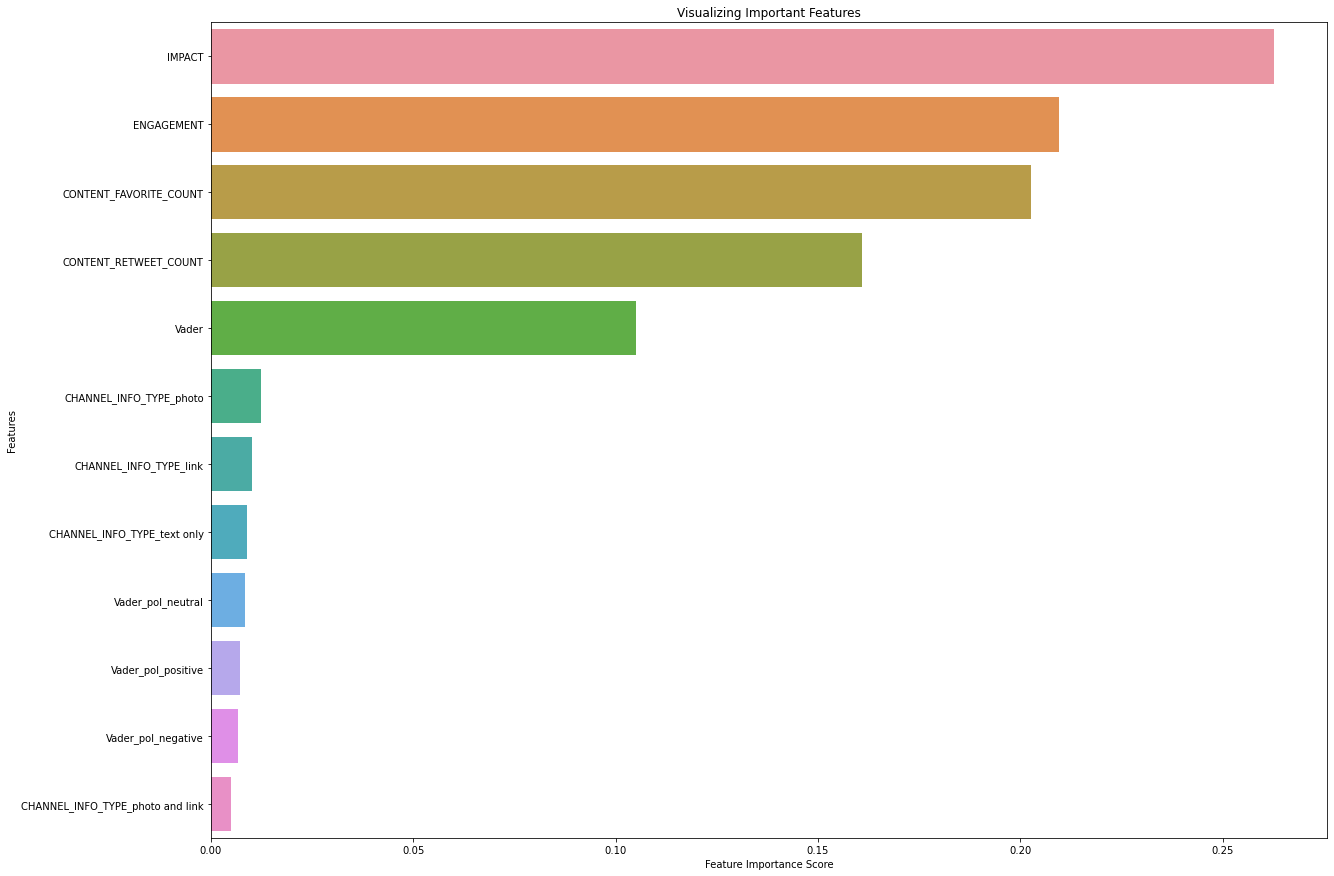

In [120]:
# View the feature scores 
plt.figure(figsize=(20,15))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

## Build Random Forest model on selected features 

In [86]:
X = df.drop(['CHANNEL_INFO_TYPE_photo and link','Vader_pol_negative'], axis=1)

Y = df['GAMERESULTS']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state =42)

In [88]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 1.0000


## Version 2


In [89]:
X = df.drop(['GETVACC','RECVDVACC','SSA_APPLY','MH_NOTGET','FREEFOOD','SNAP_YN','MH_SVCS'], axis=1)

Y = df['GETVACC']

KeyError: "['GETVACC' 'RECVDVACC' 'SSA_APPLY' 'MH_NOTGET' 'FREEFOOD' 'SNAP_YN'\n 'MH_SVCS'] not found in axis"

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state =42)

In [91]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 1.0000


In [92]:
# View the feature scores 
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

GAMERESULTS                    0.960397
IMPACT                         0.010471
ENGAGEMENT                     0.007384
CONTENT_FAVORITE_COUNT         0.007370
CONTENT_RETWEET_COUNT          0.006485
Vader                          0.005423
CHANNEL_INFO_TYPE_photo        0.000587
Vader_pol_positive             0.000582
Vader_pol_neutral              0.000463
CHANNEL_INFO_TYPE_text only    0.000458
CHANNEL_INFO_TYPE_link         0.000381
dtype: float64

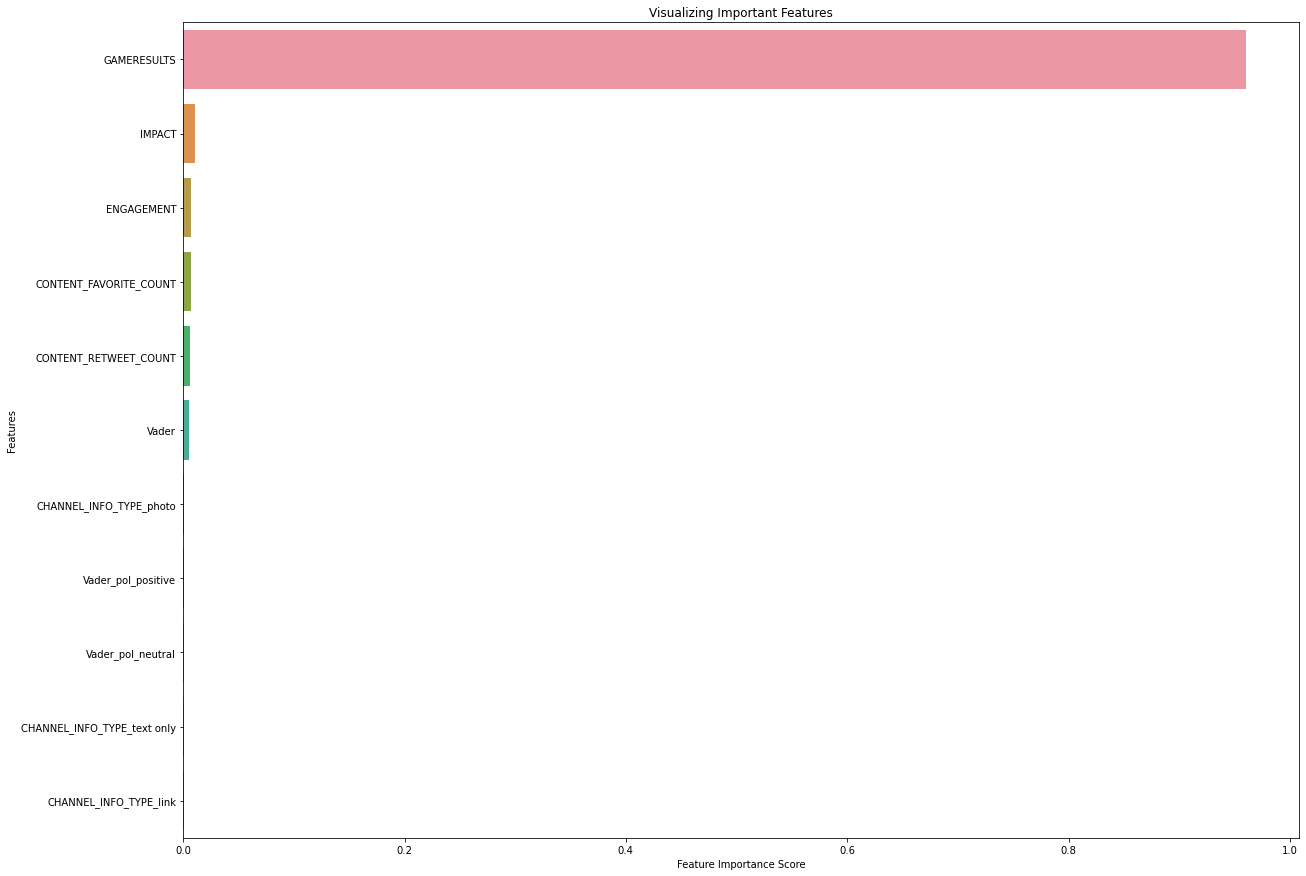

In [93]:
# View the feature scores 
plt.figure(figsize=(20,15))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

## Confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 5496 14896]
 [ 3401 50998]]


In [2]:
from sklearn.metrics import confusion_matrix

In [4]:
plot_confusion_matrix(cm,
                      y_test,
                      y_test,
                      display_labels=["Get Vaccine", "No Vaccine"])

NameError: name 'plot_confusion_matrix' is not defined

## Classification Report 

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.27      0.38     20392
           1       0.77      0.94      0.85     54399

    accuracy                           0.76     74791
   macro avg       0.70      0.60      0.61     74791
weighted avg       0.73      0.76      0.72     74791

